# Task 1 - Simple Linear Classification

In this assignment you will practice putting together a simple image classification pipeline, based on the SVM and Softmax classifier. 

The goals of this assignment are as follows:
* understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
* understand the train / val / test splits and the use of validation data for hyperparameter tuning.
* develop proficiency in writing efficient vectorized code with numpy

* implement and apply a Softmax classifier
* implement and apply a Multiclass Support Vector Machine (SVM) classifier

* understand the differences and tradeoffs between these classifiers

---
## 0 - Import necessary libraries and informations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=8)

Write down your Name and Student ID

In [2]:
## --- start your code here ----

NIM = 1301174682
Nama = "Muhammad Ihza Mahendra"

## --- end your code here ----

---
---
## 1 - Load CIFAR-10 Dataset

* First, Obtain Cifar-10 dataset.
  There are from various source in Internet like [Keras](https://keras.io/datasets/), [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets), or any other source
* Next you will prepare the dataset by first:
 * visualizing data
 * split into training, validation, and testing set
 * normalize data

---
### a. Import Data ***CIFAR-10***

In [3]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'forse', 'ship', 'truck']


170500096/170498071 [==============================] - 3s 0us/step


Check your implementation

In [4]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


**Expected Output**: 
<pre>
X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


---
### b. Visualizing Data


Show the first 20 images from X_train

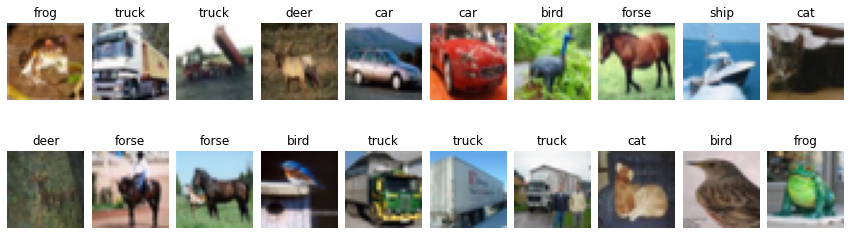

In [5]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10,0]])
        ax[j,i].axis('off')
plt.show()

---
### c. Split Training Data


#####<font color='red'>**EXERCISE**: </font>
* Cut the `last 10000 data` from `Training Set`, and save it as `Validation Set`

In [6]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_val = X_train[-X_train.shape[0]//5:, :, :]
y_val = y_train[-y_train.shape[0]//5:, :]

X_train = X_train[:-X_train.shape[0]//5, :, :]
y_train = y_train[:-y_train.shape[0]//5, :]


Check your implementation

In [7]:
print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 32, 32, 3)
y_val.shape   = (10000, 1)
X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000, 1)


**Expected Output**: 
<pre>X_val.shape   = (10000, 32, 32, 3)
y_val.shape   = (10000, 1)
X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000, 1)

---
### d. Normalizing Data

##### <font color='red'>**EXERCISE**: </font>
* Normalize `X_train`, `X_val`, and `X_test` by *zero-centering* them:
    1. calculate the `mean` of training data `X_train`
    * subtract `X_train`, `X_val`, and `X_test` using mean of `X_train`

In [8]:
mean_image = np.mean(X_train)

X_train = (X_train - mean_image)/np.std(X_train)
X_val   = X_val - mean_image/np.std(X_train)
X_test  = X_test - mean_image/np.std(X_train)

In [9]:
mean_image

120.67766

Check your implementation

In [10]:
print('np.mean(X_train) =',np.mean(X_train))
print('np.mean(X_val)   =',np.mean(X_val))
print('np.mean(X_test)  =',np.mean(X_test))

np.mean(X_train) = 4.9464265e-06
np.mean(X_val)   = 0.14816807
np.mean(X_test)  = 0.8513755


**Expected Output**: 
<pre>np.mean(X_train) = -9.2315673e-07
np.mean(X_val)   = 0.14794703
np.mean(X_test)  = 0.8511902

---
### e. Reshape Data

#####<font color='red'>**EXERCISE**: </font>
* Reshape each data in `X_train`, `X_val`, and `X_test` into 1-dimensional matrix 

*Hint: use `np.reshape()`*

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val   = np.reshape(X_val, (X_val.shape[0], -1))
X_test  = np.reshape(X_test, (X_test.shape[0], -1))

Check your implementation

In [12]:
print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)

X_train.shape = (40000, 3072)
X_val.shape   = (10000, 3072)
X_test.shape  = (10000, 3072)


**Expected Output**: 
<pre>X_train.shape = (40000, 3072)
X_val.shape   = (10000, 3072)
X_test.shape  = (10000, 3072)


#####<font color='red'>**EXERCISE**: </font>
* Reshape `y_train`, `y_val`, and `y_test` into a vector 

*Hint: use `np.ravel()`*

In [13]:
y_train = np.ravel(y_train)
y_val   = np.ravel(y_val)
y_test  = np.ravel(y_test)

Check your implementation

In [14]:
print('y_train.shape =',y_train.shape)
print('y_val.shape   =',y_val.shape)
print('y_test.shape  =',y_test.shape)

y_train.shape = (40000,)
y_val.shape   = (10000,)
y_test.shape  = (10000,)


**Expected Output**: 
<pre>y_train.shape = (40000,)
y_val.shape   = (10000,)
y_test.shape  = (10000,)


---
---
## 2 - Linear Function
* Complete the forward and backward function of basic linear regression function


---
### a. Forward Function

#####<font color='red'>**EXERCISE**: </font>
* Implement `forward function` for Linear Classifier as follow:

$$
\begin{align}
f(x, W, b) = x.W + b
\end{align}
$$

In [15]:
def forward(x, W, b):  
    v = np.dot(x,W)+b             # x dot W + b    
    
    return v

Check your implementation

In [16]:
np.random.seed(2020)

X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
W = np.random.random((3, 2)) 
b = np.zeros((1, 2))

v = forward(X, W, b)

print('v.shape =', v.shape)
print('v =')
print(v)


v.shape = (4, 2)
v =
[[0.33691873 0.21695427]
 [0.84666425 0.48878998]
 [1.32319556 1.09034621]
 [1.83294108 1.36218193]]


**Expected Output**: 
<pre>v.shape = (4, 2) 
v =
[[0.33691873 0.21695427]
 [0.84666425 0.48878998]
 [1.32319556 1.09034621]
 [1.83294108 1.36218193]]

---
### b. Backward Function


#####<font color='red'>**EXERCISE**: </font>
* Implement `backward function` for Linear Classifier as follow:


$$
\begin{align*}
\partial W & = x^T.\partial out \\
\partial b & = \sum \partial out \\
\partial x & = \partial out.W^T \\
\end{align*}
$$

*Hint: use `axis=0` and `keepdims=True` to calculate $\partial b$*

In [17]:
def backward(dout, x, W, b):
    dW = np.dot(x.T,dout)                        # x.T dot dout
    db = np.sum(dout, axis=0, keepdims=True)                        # sum dout, axis=0, keepdims=True
    dx = np.dot(dout,W.T)               # dout dot W.T
    
    return dW, db, dx

Check your implementation

In [18]:
np.random.seed(2020)

dout = np.random.random((4, 2)) 
dW, db, dX = backward(dout, X, W, b)


In [19]:
print('dW.shape =', dW.shape)
print('dW =')
print(dW)

dW.shape = (3, 2)
dW =
[[0.61339587 0.56026986]
 [0.78622267 0.61515131]
 [2.10941822 1.70549752]]


**Expected Output**: 
<pre>
dW.shape = (3, 2) 
dW =
[[0.61339587 0.56026986]
 [0.78622267 0.61515131]
 [2.10941822 1.70549752]]


In [20]:
print('db.shape =', db.shape)
print('db =', db)

db.shape = (1, 2)
db = [[2.10941822 1.70549752]]


**Expected Output**: 
<pre>db.shape = (1, 2)
db = [[2.10941822 1.70549752]]

In [21]:
print('dX.shape =', dX.shape)
print('dX =')
print(dX)

dX.shape = (4, 3)
dX =
[[1.73555547 0.74016932 0.52178124]
 [0.74016932 0.33373516 0.23071873]
 [0.52178124 0.23071873 0.16058338]
 [0.57253207 0.23425843 0.16763411]]


**Expected Output**: 
<pre>dX.shape = (4, 3)
dX =
[[1.73555547 0.74016932 0.52178124]
 [0.74016932 0.33373516 0.23071873]
 [0.52178124 0.23071873 0.16058338]
 [0.57253207 0.23425843 0.16763411]]


---
---
## 3 - Softmax Function

* A very important concept to understand in numpy is `"broadcasting"`. 
* It is very useful for performing mathematical operations between arrays of different shapes. 
* For the full details on broadcasting, you can read the official [broadcasting documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

---
### a. Softmax Score

#####<font color='red'>**EXERCISE**: </font>
* Implement a `softmax score function` using numpy.


for a matrix $x \in \mathbb{R}^{m\times n}$
- $ n $ &nbsp; : number of data
- $ m $ &nbsp;: number of label
$x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$ 


thus we have
$$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix}$$

it is equal to
$$softmax(x)  = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [22]:
def softmax(x):
    """Calculates the softmax for each row of the input x.

Argument:
    x -- A numpy matrix of shape (n,m)

    Returns:
    score -- A numpy matrix equal to the softmax of x, of shape (n,m)
          -- normalized log probabilities score
    """
    
    # 1. COMPUTE THE CLASS PROBABILITIES    
    
    # shift x by subtracting with its maximum value . Use np.max(...)
    x = x - np.max(x)
    
    # Apply exp() element-wise to x. Use np.exp(...).    
    x_exp = np.exp(x)

    # Create a vector X_sum that sums each row of X_exp.
    # Use np.sum(..., axis = 1, keepdims = True).
    x_sum = np.sum(x_exp, axis = 1, keepdims = True )
    
    # Compute softmax(x) score by dividing X_exp by X_sum. 
    # It should automatically use numpy broadcasting.
    score = x_exp / x_sum
    
    return score

Check your implementation

In [23]:
np.random.seed(2020)

x = np.array([
    [1, 3, 0, 1 ,1],
    [0, 2, 0, 1, 9],
    [0, 1, 0, 1, 0]])

W = np.random.random((5, 2)) 
b = np.zeros((1, 2))

score = forward(x, W, b)

print("score = " )
print(score,'\n')
print("softmax(score) = " )
print(softmax(score))

score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]]


**Expected Output**:
<pre>score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]] 

loss   = 2.526128866233045 

dscore =
[[-0.06255598  0.06255598]
 [ 0.33294664 -0.33294664]
 [-0.15244539  0.15244539]]

---
### b. Softmax Loss

#####<font color='red'>**EXERCISE**: </font>
* Implement a `softmax loss` function using numpy. 
 
- Loss of the `i-th data` is the normalized log probability of the score at the class should be<br>
  $$L_i =  -\log(\frac{e^{X_{y_i}}}{\sum_{j}e^{X_{j}}})$$<br><br>
 
- The Softmax Loss is the average of all data loss<br>
  $$L = \frac{1}{N}\sum^N_{i=1}L_i$$

In [24]:
def softmax_loss(score, y):
    """Calculates the softmax loss for each row of the input x.
    
    Argument:
    score -- A numpy matrix equal to the softmax of x, of shape (n,m)
          -- normalized log probabilities score
          
    y     -- A numpy vector of shape(n,)
          -- containing training labels;
          -- y[i] = c means that X[i] has label c, where 0 <= c < C.

    Returns:
    dscore -- A numpy matrix equal to the softmax of x, of shape (n,m)
           -- gradient score of softmax
    """
    
    num_examples = score.shape[0]
        
    # 2. COMPUTE THE LOSS : average cross-entropy loss
    #make a number list containing [1 2 3 ... n]
#     number_list = list(range(num_examples))
    number_list = [i for i in range(1, num_examples+1)]
    
    # calculate the correct log probability of score[number_list,y] by applycing -np.log(...)
    corect_logprobs = - np.log(score[range(num_examples), y])
    
    # average the correct log probability, use np.sum then divide it by num_examples
    loss = np.sum(corect_logprobs) / num_examples
    
    # 3. COMPUTE THE GRADIENT ON SCORES
    dscores = score
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    return loss, dscores

Check your implementation

In [25]:
np.random.seed(2020)

x = np.array([
    [1, 3, 0, 1 ,1],
    [0, 2, 0, 1, 9],
    [0, 1, 0, 1, 0]])

y = np.array([
    0, 1, 0
])

W = np.random.random((5, 2)) 
b = np.zeros((1, 2))

score = forward(x, W, b)

print("score = " )
print(score, '\n')

score = softmax(score)
print("softmax(score) = " )
print(score,'\n')

loss, dscore  = softmax_loss(score, y)
print('loss   =',loss, '\n')
print('dscore =')
print(dscore)


score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]] 

loss   = 2.526128866233045 

dscore =
[[-0.06255598  0.06255598]
 [ 0.33294664 -0.33294664]
 [-0.15244539  0.15244539]]


**Expected Output**:
<pre>score = 
[[3.65414948 2.18891435]
 [9.05539861 2.29728405]
 [0.78622267 0.61515131]] 

softmax(score) = 
[[0.81233207 0.18766793]
 [0.99883993 0.00116007]
 [0.54266384 0.45733616]] 

loss   = 2.526128866233045 

dscore =
[[-0.06255598  0.06255598]
 [ 0.33294664 -0.33294664]
 [-0.15244539  0.15244539]]